# CRIME PREDICTION USING ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline
df=pd.read_csv('crime.csv')
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


# DROPPING UNWANTED COLUMNS

In [2]:
dataset = pd.DataFrame(df)
dataset = dataset.drop(['YEAR','MONTH','DAY','HOUR','MINUTE','HUNDRED_BLOCK','NEIGHBOURHOOD','X','Y','Latitude'], axis=1	)
dataset

,TYPE,Longitude
0,Other Theft,-123.083763
1,Other Theft,-123.083763
2,Other Theft,-123.083763
3,Other Theft,-123.083763
4,Other Theft,-123.083763
5,Other Theft,-123.083763
6,Break and Enter Residential/Other,-123.146610
7,Mischief,-123.193725
8,Other Theft,-123.083763
9,Break and Enter Residential/Other,-123.067654


# A DEMO VIEW OF 30 ROWS

In [3]:
df.head(30)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


# DEMO DATA

In [4]:
demo_view = df.iloc[1]
demo_view

TYPE                  Other Theft
YEAR                         2003
MONTH                           5
DAY                             7
HOUR                           15
MINUTE                         20
HUNDRED_BLOCK    9XX TERMINAL AVE
NEIGHBOURHOOD          Strathcona
X                          493906
Y                     5.45745e+06
Latitude                  49.2698
Longitude                -123.084
Name: 1, dtype: object

# REDUCING SIZE OF DATASET

**INDEPENDENT VARIABLE**

In [5]:
x=df.head(2000)
x

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


**LATITUDE**

In [6]:
a = x.iloc[:,10:11].values
a

array([[49.26980201],
       [49.26980201],
       [49.26980201],
       ...,
       [49.25790483],
       [49.26507697],
       [49.2223033 ]])

**LONGITUDE**

In [7]:
b = x.iloc[:,11].values
b


array([-123.0837633, -123.0837633, -123.0837633, ..., -123.0328596,
       -123.0647989, -123.1549815])

# TAKING AVERAGE OF LATITUDE AND LONGITUDE

In [8]:
X=[]
for i in range(0,2000):
    ab = a[i]+b[i]
    X.append(ab/2)

X

[array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.95927986]),
 array([-36.96908301]),
 array([-36.90698064]),
 array([-36.89996007]),
 array([-36.90698064]),
 array([-36.97032248]),
 array([-36.89981339]),
 array([-36.89978543]),
 array([-36.92942681]),
 array([-36.91905468]),
 array([-36.89963876]),
 array([-36.90698064]),
 array([0.]),
 array([-36.90698064]),
 array([-36.92077292]),
 array([-36.92153414]),
 array([-36.91962003]),
 array([0.]),
 array([-36.97336592]),
 array([-36.97309734]),
 array([-36.97285503]),
 array([-36.97285503]),
 array([-36.92375854]),
 array([-36.92412126]),
 array([-36.92351182]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([-36.92351182]),
 array([-36.92351182]),
 array([-36.9226299]),
 array([-36.88334989]),
 array([-36.92125716]),
 array([-36.92415475]),
 array([-36.92343965]),
 array([-36.92491736]),
 array([0.]),
 

# DEPENDENT VARIABLE

**REDUCING SIZE TO 2K**

In [9]:
y=df.head(2000)
y

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


**DEPENDENT VARIABLE TAKEN**

In [10]:
y = y.iloc[:,0:1].values
y

array([['Other Theft'],
       ['Other Theft'],
       ['Other Theft'],
       ...,
       ['Vehicle Collision or Pedestrian Struck (with Injury)'],
       ['Break and Enter Residential/Other'],
       ['Break and Enter Residential/Other']], dtype=object)

# FINDING DIFFERENT TYPES OF CRIME

In [11]:
YY = [] 
ynum=0
for i in y: 
    if i not in YY: 
        ynum+=1
        YY.append(i)

YY

[array(['Other Theft'], dtype=object),
 array(['Break and Enter Residential/Other'], dtype=object),
 array(['Mischief'], dtype=object),
 array(['Break and Enter Commercial'], dtype=object),
 array(['Offence Against a Person'], dtype=object),
 array(['Theft from Vehicle'], dtype=object),
 array(['Vehicle Collision or Pedestrian Struck (with Injury)'],
       dtype=object)]

**THERE ARE 7 DIFFERENT TYPES OF CRIMES IN THE DATASET**

In [12]:
ynum

7

# REPLACING EACH CRIME WITH A NUMBER FOR EASY COMPUTATION

In [13]:
Y=y

for i in range(0,2000):
    if Y[i]=='Other Theft':
        Y[i]=1
    elif Y[i]=='Break and Enter Residential/Other':
        Y[i]=2
    elif Y[i]=='Mischief':
        Y[i]=3
    elif Y[i]=='Break and Enter Commercial':
        Y[i]=4
    elif Y[i]=='Offence Against a Person':
        Y[i]=5
    elif Y[i]=='Theft from Vehicle':
        Y[i]=6
    else:
        Y[i]=7

Y
  


array([[1],
       [1],
       [1],
       ...,
       [7],
       [2],
       [2]], dtype=object)

# DATA VISUALIZATION

In [14]:
X

[array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.95927986]),
 array([-36.96908301]),
 array([-36.90698064]),
 array([-36.89996007]),
 array([-36.90698064]),
 array([-36.97032248]),
 array([-36.89981339]),
 array([-36.89978543]),
 array([-36.92942681]),
 array([-36.91905468]),
 array([-36.89963876]),
 array([-36.90698064]),
 array([0.]),
 array([-36.90698064]),
 array([-36.92077292]),
 array([-36.92153414]),
 array([-36.91962003]),
 array([0.]),
 array([-36.97336592]),
 array([-36.97309734]),
 array([-36.97285503]),
 array([-36.97285503]),
 array([-36.92375854]),
 array([-36.92412126]),
 array([-36.92351182]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([-36.92351182]),
 array([-36.92351182]),
 array([-36.9226299]),
 array([-36.88334989]),
 array([-36.92125716]),
 array([-36.92415475]),
 array([-36.92343965]),
 array([-36.92491736]),
 array([0.]),
 

**MANY NULL VALUES WERE FOUND**

# DATA CLEANING

**THE NULL VALUE ROWS SHOULD BE DROPPED**

In [15]:
nullvals=0
for i in X:
    if i>=0:
        nullvals+=1

nullvals


167

**167 SUCH ROWS WERE FOUND**

**REMOVING THOSE 167 ROWS IN BOTH X AND Y**

In [16]:
YY=Y.tolist()
popin=0

for i in X:
     if i>=0:
        X.pop(popin)
        YY.pop(popin)
        popin+=1

In [17]:
XXvals=0
for i in X:
    XXvals+=1
XXvals

1857

In [18]:
X

[array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.96908301]),
 array([-36.89996007]),
 array([-36.97032248]),
 array([-36.89978543]),
 array([-36.91905468]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.92153414]),
 array([0.]),
 array([-36.97309734]),
 array([-36.97285503]),
 array([-36.92412126]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([-36.92351182]),
 array([-36.88334989]),
 array([-36.92415475]),
 array([-36.92491736]),
 array([-36.89839439]),
 array([-36.92491736]),
 array([-36.92491736]),
 array([-36.92491736]),
 array([-36.92491736]),
 array([-36.92283211]),
 array([-36.92121228]),
 array([-36.92121228]),
 array([-36.92351182]),
 array([-36.92351182]),
 array([-36.97660764]),
 array([-36.92121228]),
 array([-36.92171274]),
 array([-36.97706912]),
 array([-36.97697028]),
 array([-36.9288933]),
 array([-36.92351182]),
 array([-36.9766731]),
 array([-36.92351182]),
 array([-36.92360954]),
 array([-36.9237471]),
 array([-36

In [19]:
YYvals=0
for i in YY:
     YYvals+=1

YYvals

1857

In [20]:
YY = np.array(YY, dtype=np.int)

In [21]:
YYvals=0
for i in YY:
    YYvals+=1

YYvals

1857

# FINDING THE NUMBER OF EACH TYPE OF CRIME

In [22]:
theft=0
breakin=0
mischief=0
commercial=0
offence=0
vehicle=0
collision=0

for i in YY:
    if i == 1:
        theft+=1
    elif i == 2:
        breakin+=1
    elif i == 3:
        mischief+=1
    elif i == 4:
        commercial+=1
    elif i == 5:
        offence+=1
    elif i == 6:
        vehicle+=1
    elif i == 7:
        collision+=1


print("Number of thefts= ", theft)
print("Number of break and Enter Residential/Other = ", breakin)
print("Number of mischief = ", mischief)
print("Number of Break and Enter Commercial= ", commercial)
print("Number of Offence Against a Person = ", offence)
print("Number of Theft from Vehicle = ", vehicle)
print("Number of Vehicle Collision or Pedestrian Struck (with Injury) = ", collision)


Number of thefts=  72
Number of break and Enter Residential/Other =  300
Number of mischief =  169
Number of Break and Enter Commercial=  173
Number of Offence Against a Person =  152
Number of Theft from Vehicle =  200
Number of Vehicle Collision or Pedestrian Struck (with Injury) =  791


# VIEWING THE CRIME PLOT GRAPH

**BAR GRAPH**

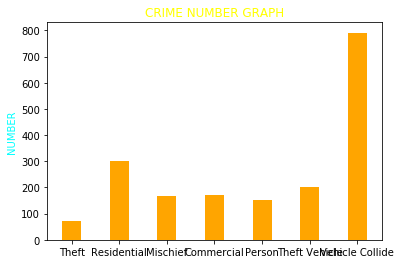

In [23]:
labels = ['Theft', 'Residential','Mischief','Commercial','Person','Theft Vehicle', 'Vehicle Collide']
number = [theft,breakin,mischief,commercial,offence,vehicle,collision]

fig, ax = plt.subplots()

width = 0.4

ax.bar(labels, number,width, color='Orange')

ax.set_ylabel('NUMBER', color= 'aqua')
ax.set_title('CRIME NUMBER GRAPH', color='yellow')

plt.show()


**PIE CHART**

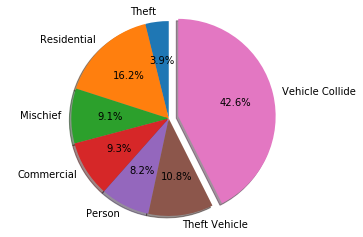

In [24]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Theft', 'Residential','Mischief','Commercial','Person','Theft Vehicle', 'Vehicle Collide'
sizes = [theft,breakin,mischief,commercial,offence,vehicle,collision]
explode = (0, 0, 0, 0, 0, 0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

# USING KNN

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,YY,test_size=0.30)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(X_train,y_train)

C:\Users\govin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [31]:
print(confusion_matrix(y_test,pred))

[[ 23   0   0   0   0   0   2]
 [  0  50   5   5   0   5  28]
 [  0   2   5   3   0   4  35]
 [  1   2   1  24   0   2  14]
 [  0   0   0   0  50   0   0]
 [  2   6   1   1   0  40  15]
 [ 13  33  15  15   0   8 148]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.59      0.92      0.72        25
           2       0.54      0.54      0.54        93
           3       0.19      0.10      0.13        49
           4       0.50      0.55      0.52        44
           5       1.00      1.00      1.00        50
           6       0.68      0.62      0.65        65
           7       0.61      0.64      0.62       232

    accuracy                           0.61       558
   macro avg       0.59      0.62      0.60       558
weighted avg       0.59      0.61      0.60       558



In [33]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,YY,cv=10)
    accuracy_rate.append(score.mean())

C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

In [34]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,YY,cv=10)
    error_rate.append(1-score.mean())

C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\govin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

Text(0, 0.5, 'Error Rate')

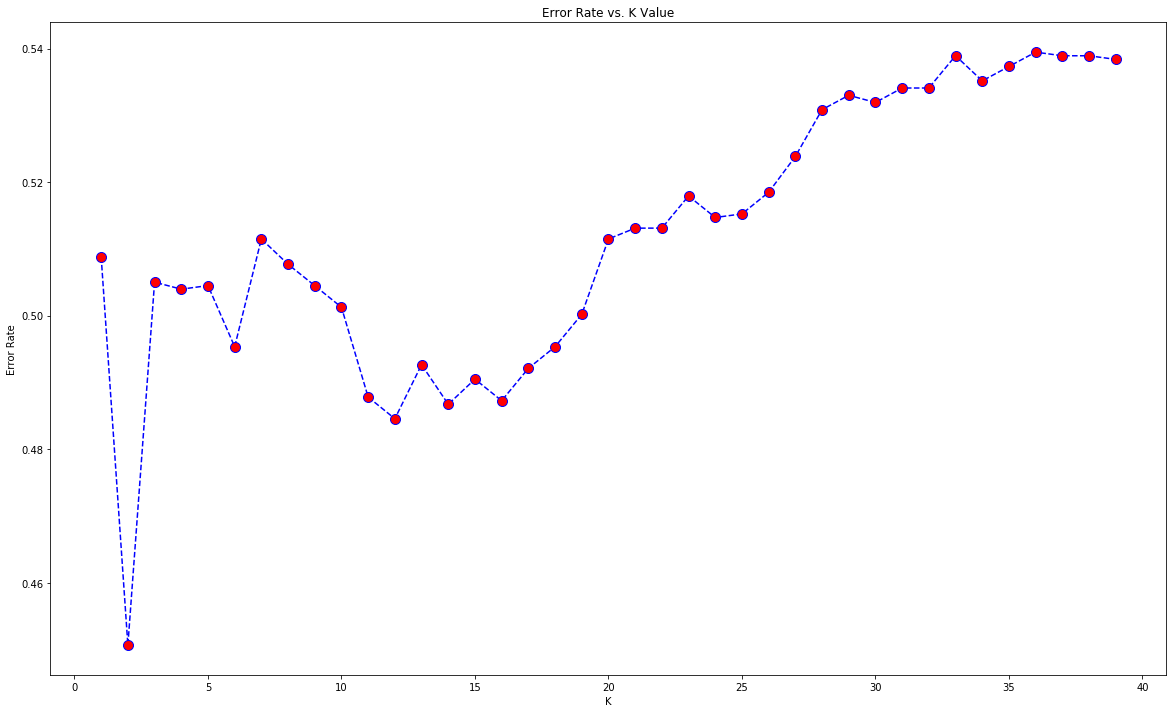

In [35]:
plt.figure(figsize=(20,12))
#plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# NOW WITH K=8
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=8


[[ 12   0   0   2   0   2   9]
 [  2  34   2  15   0   5  35]
 [  2   2   9   6   0   7  23]
 [  0   1   0  10   0   3  30]
 [  0   0   0   0  50   0   0]
 [  0   0   0   5   0  36  24]
 [ 11  16   4   5   0  10 186]]


              precision    recall  f1-score   support

           1       0.44      0.48      0.46        25
           2       0.64      0.37      0.47        93
           3       0.60      0.18      0.28        49
           4       0.23      0.23      0.23        44
           5       1.00      1.00      1.00        50
           6       0.57      0.55      0.56        65
           7       0.61      0.80      0.69       232

    accuracy                           0.60       558
   macro avg       0.59      0.52      0.53       558
weighted avg       0.61      0.60      0.58       558



C:\Users\govin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


# CRIME PREDICTING

**THE DATASET IS CONCENTRATED IN ONE PLACE ONLY DUE TO WHICH THE LATITUDE-LONGITUDE RANGE CAN VARY ONLY FROM -30 to -40**

In [37]:
print("Give the desired Longitude")
longi = float(input())
print("Give the desired Latitude")
latit = float(input())
longlang = (longi+latit)/2
inp = np.array([longlang]) 
inp = inp.reshape(1, -1)

prediction = knn.predict(inp)

if (prediction == 1):
  print("Crime is Theft")
elif (prediction == 3):
  print("Crime is mischief")
elif (prediction == 2):
  print("Crime is Break and Enter Residential")
elif (prediction == 4):
  print("Crime is Break and Enter commercial")
elif (prediction == 5):
  print("Crime is Offence against a person")
elif (prediction == 6):
  print("Crime is Theft from vehicle")
else:
  print("Crime is Vehicle Collision or pedestrian struck/injured")

Give the desired Longitude
-34.5
Give the desired Latitude
-33.1
Crime is Vehicle Collision or pedestrian struck/injured


# THE OUTPUT USUALLY WOULD GIVE ONLY "Vehicle Collision or pedestrian struck/injured" BECAUSE THATS THE HIGHEST NUMBER OF CRIME IN THE DATASET. A BETTER DATASET WOULD GIVE BETTER RESULTS